In [10]:
import pandas as pd
import time
import dask
import os

need to set up a local spark environment to run this aggregation. do set-up your own method.

In [11]:
import findspark
findspark.find()

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import *

def set_spark_session():
    spark = SparkSession.builder.\
    appName("SomeAppName").\
    getOrCreate()
    return spark

spark = set_spark_session()

In [12]:
mach = pd.read_csv("logs/cluster_id_monitor",sep=":",dtype=str)
mach.columns = ['LOG','USER','STAGE','Clustered precinct ID','DATA','TIMEIT']
mach[mach['STAGE']=='PARSING_OK']['Clustered precinct ID'].drop_duplicates().shape

(3031,)

## Aggregate ERs for President Cummulative Votes

Can be replicated for VP, Senators and Partylist cummulative votes

In [13]:
presidents = spark.read.csv("data/presidents_votes_*",header=True)

In [14]:
presidents.select("Candidate").distinct().show()

22/05/11 05:33:21 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39020707
22/05/11 05:33:21 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39020708
22/05/11 05:33:21 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39020709
22/05/11 05:33:21 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39030906
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39101382
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39081273
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010002
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39111572
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39101415
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010171
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010081
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010111
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010385
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010276
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010300
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020141
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010376
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020063
22/05/11 05:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020247
22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020341
22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020309
22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020357
22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020385
22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020299
22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020459
22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030024
22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020522
22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030077
22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030199
22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030118
22/05/11 05:33:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030225
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030258
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030354
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040222
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040019
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040245
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050008
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040456
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040321
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040449
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050183
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040405
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050214
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050170
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050337
22/05/11 05:33:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050433
22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070028
22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070091
22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070239
22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070088
22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070324
22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070234
22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070318
22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070470
22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070539
22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070561
22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070540
22/05/11 05:33:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

+--------------------+
|           Candidate|
+--------------------+
|         Valid votes|
|DOMAGOSO, ISKO MO...|
|  LACSON, PING (PDR)|
|MARCOS, BONGBONG ...|
| ROBREDO, LENI (IND)|
|         Under-votes|
|GONZALES, NORBERT...|
|MONTEMAYOR, JOSE ...|
|MANGONDATO, FAISA...|
|DE GUZMAN, LEODY ...|
| ABELLA, ERNIE (IND)|
|Votes obtained by...|
|PACQUIAO, MANNY P...|
+--------------------+



In [15]:
presidents_pdf = presidents.toPandas()

22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39020707
22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39020708
22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39020709
22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39101374
22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39101343
22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39101414
22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39131217
22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010167
22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010110
22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020019
22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010363
22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010395
22/05/11 05:33:29 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020085
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020211
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020148
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020411
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020313
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020374
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030079
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020605
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020577
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030111
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030275
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030299
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040040
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030348
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030322
22/05/11 05:33:30 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040168
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040379
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040342
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050134
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040408
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040461
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050375
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050217
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050248
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070044
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050368
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070093
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070335
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070260
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070122
22/05/11 05:33:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 05:33:32 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070592
22/05/11 05:33:32 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070422
22/05/11 05:33:32 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070512
22/05/11 05:33:32 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

In [16]:
presidents_pdf['Percentage'] = presidents_pdf['Percentage'].apply(lambda x: float(x.split("%")[0].strip(" ")))

In [21]:
cols = ['Valid votes','Votes obtained by all candidates','Under-votes','Votes obtained by all candidates']
presidents_pdf[presidents_pdf['Candidate'].isin(cols)==False].to_csv("./processed/ERS_TRANSMITTED_PRESIDENT.csv",sep="|", index=False)

make zip file. on linux this can be done.

In [23]:
!zip ./processed/ERS_TRANSMITTED_PRESIDENT.csv.zip ./processed/ERS_TRANSMITTED_PRESIDENT.csv

  adding: processed/ERS_TRANSMITTED_PRESIDENT.csv (deflated 89%)


## Do quick histogram

In [19]:
pd.unique(presidents_pdf['Candidate'])

array(['ABELLA, ERNIE (IND)', 'DE GUZMAN, LEODY (PLM)',
       'DOMAGOSO, ISKO MORENO (AKSYON)', 'GONZALES, NORBERTO (PDSP)',
       'LACSON, PING (PDR)', 'MANGONDATO, FAISAL (KTPNAN)',
       'MARCOS, BONGBONG (PFP)', 'MONTEMAYOR, JOSE JR. (DPP)',
       'PACQUIAO, MANNY PACMAN(PROMDI)', 'ROBREDO, LENI (IND)',
       'Under-votes', 'Valid votes', 'Votes obtained by all candidates'],
      dtype=object)

<AxesSubplot:>

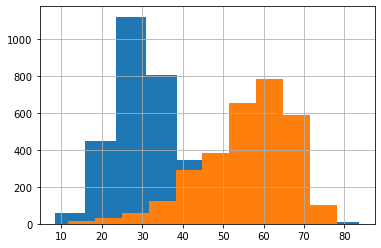

In [20]:
presidents_pdf[presidents_pdf['Candidate']=='ROBREDO, LENI (IND)']['Percentage'].hist()
presidents_pdf[presidents_pdf['Candidate']=='MARCOS, BONGBONG (PFP)']['Percentage'].hist()